In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
hist = pd.read_csv("https://raw.githubusercontent.com/bialasann/CS208_data/main/checkpoints_PUMS/model_history.csv")
hist.head()

,epoch,loss,accuracy,val_loss,val_accuracy,epsilon,delta,best
0,0,1.9397,0.3122,1.7797,0.3540,0.0304,0.0,0
1,1,1.8457,0.3330,1.6790,0.3854,67.2817,0.0,0
2,2,1.7696,0.3764,1.5034,0.5273,72.3468,0.0,0
3,3,1.6085,0.4612,1.2958,0.5861,77.4118,0.0,0
4,4,1.4935,0.5049,1.2266,0.6096,82.4768,0.0,0


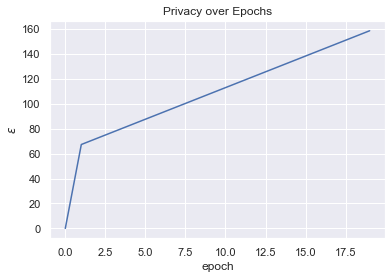

In [12]:
# Plot epsilon growth. Values copied and pasted from model_history.csv. 
sns.set()

x = hist[['epoch']]
y = hist[['epsilon']]

plt.plot(x, y)
plt.xlabel('epoch')
plt.ylabel(r'$\epsilon$')
plt.title('Privacy over Epochs');

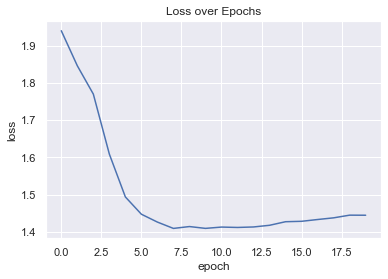

In [241]:
sns.set()

x = hist[['epoch']]
y = hist[['loss']]

plt.plot(x, y)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss over Epochs');

In [92]:
import pandas as pd

# Read in PUMS data
data_original = pd.read_csv("https://raw.githubusercontent.com/privacytoolsproject/cs208/master/data/MaPUMS5full.csv")

In [212]:
# Read in synthetic data

data_synthetic = pd.read_csv("https://raw.githubusercontent.com/bialasann/CS208_data/main/syn_data_PUMs.txt", header = None)
data_synthetic = data_synthetic.drop(0, axis=1)

In [213]:
data_synthetic.columns = data_original.columns

In [214]:
data_original.head()

,state,puma,sex,age,educ,income,latino,black,asian,married,divorced,uscitizen,children,disability,militaryservice,employed,englishability,fips
0,25,100,0,33,10,35000.0,0,0,0,1,0,1,0,0,0,1,1,25003
1,25,100,0,60,10,1900.0,0,0,0,1,0,1,0,1,0,0,1,25003
2,25,100,1,60,9,0.0,0,0,0,1,0,1,0,0,0,0,1,25003
3,25,100,0,34,9,17000.0,0,0,0,0,0,1,0,0,0,1,1,25003
4,25,100,0,28,9,19300.0,0,0,0,1,0,1,0,0,1,1,1,25003


In [215]:
data_synthetic.head()

,state,puma,sex,age,educ,income,latino,black,asian,married,divorced,uscitizen,children,disability,militaryservice,employed,englishability,fips
0,25,24,26,0,1,70,0,1,0,0,1,1,1,0,1,0,0,25007
1,25,25000,1,61,1,0,1,1,0,0,1,1,0,0,1,2,25,61
2,25,2,254,0,0,0,0,0,0,0,1,0,1,0,1,1,0,25017
3,25,29,10,1431,24,200,1,0,0,0,0,0,1,0,1,1,1,25017
4,25,21,10,15,99,25000.0,0,0,0,0,0,0,0,1,0,2,150,45


In [216]:
# Some preliminary cleaning 

data_synthetic['latino'] = np.where(data_synthetic['latino'] > 1, 1, data_synthetic['latino'])
data_synthetic['latino'] = np.where(data_synthetic['latino'] < 0, 0, data_synthetic['latino'])

data_synthetic['black'] = np.where(data_synthetic['black'] > 1, 1, data_synthetic['black'])
data_synthetic['black'] = np.where(data_synthetic['black'] < 0, 0, data_synthetic['black'])

data_synthetic['asian'] = np.where(data_synthetic['asian'] > 1, 1, data_synthetic['asian'])
data_synthetic['asian'] = np.where(data_synthetic['asian'] < 0, 0, data_synthetic['asian'])

data_synthetic['married'] = np.where(data_synthetic['married'] > 1, 1, data_synthetic['married'])
data_synthetic['married'] = np.where(data_synthetic['married'] < 0, 0, data_synthetic['married'])

data_synthetic['divorced'] = np.where(data_synthetic['divorced'] > 1, 1, data_synthetic['divorced'])
data_synthetic['divorced'] = np.where(data_synthetic['divorced'] < 0, 0, data_synthetic['divorced'])

data_synthetic['children'] = np.where(data_synthetic['children'] > 16, 16, data_synthetic['children'])
data_synthetic['children'] = np.where(data_synthetic['children'] < 0, 0, data_synthetic['children'])

data_synthetic['disability'] = np.where(data_synthetic['disability'] > 1, 1, data_synthetic['disability'])
data_synthetic['disability'] = np.where(data_synthetic['disability'] < 0, 0, data_synthetic['disability'])

data_synthetic['divorced'] = np.where(data_synthetic['divorced'] > 1, 1, data_synthetic['divorced'])
data_synthetic['divorced'] = np.where(data_synthetic['divorced'] < 0, 0, data_synthetic['divorced'])

data_synthetic['militaryservice'] = np.where(data_synthetic['militaryservice'] > 1, 1, data_synthetic['militaryservice'])
data_synthetic['militaryservice'] = np.where(data_synthetic['militaryservice'] < 0, 0, data_synthetic['militaryservice'])

data_synthetic['employed'] = np.where(data_synthetic['employed'] > 1, 1, data_synthetic['employed'])
data_synthetic['employed'] = np.where(data_synthetic['employed'] < 0, 0, data_synthetic['employed'])

data_synthetic['englishability'] = np.where(data_synthetic['englishability'] > 1, 1, data_synthetic['englishability'])
data_synthetic['englishability'] = np.where(data_synthetic['englishability'] < 0, 0, data_synthetic['englishability'])

data_synthetic['age'] = np.where(data_synthetic['age'] > 100, 100, data_synthetic['age'])
data_synthetic['age'] = np.where(data_synthetic['age'] < 0, 0, data_synthetic['age'])

data_synthetic['educ'] = np.where(data_synthetic['educ'] > 16, 16, data_synthetic['educ'])
data_synthetic['educ'] = np.where(data_synthetic['educ'] < 1, 1, data_synthetic['educ'])

data_synthetic['sex'] = np.where(data_synthetic['sex'] > 1, 1, data_synthetic['sex'])
data_synthetic['sex'] = np.where(data_synthetic['sex'] < 0, 0, data_synthetic['sex'])

data_synthetic['income'] = data_synthetic['income'].str.replace(r'[^\w\s]+', '')
data_synthetic['income'] = pd.to_numeric(data_synthetic['income'])

data_original['income'] = pd.to_numeric(data_original['income'])

### Queries

Here we compare the range of the **income** variable between datasets. 

In [217]:
max_arr = []
min_arr = []
mean_arr = []

num_samples = 1000

for i in range(1000):
    
    bootstrap = np.random.choice(data_original.iloc[:, 5], num_samples, replace = True)
    max_ = np.max(bootstrap)
    min_ = np.min(bootstrap)
    mean = np.mean(bootstrap)
    
    max_arr.append(max_)
    min_arr.append(min_)
    mean_arr.append(mean)

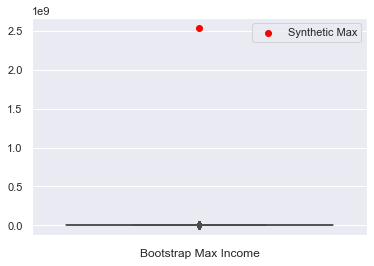

In [242]:
ax = sns.boxplot(data=np.array(max_arr))
ax.set(xticklabels=[])
ax.scatter([0], [np.max(data_synthetic.iloc[:, 5])], color = 'red', label = 'Synthetic Max')
plt.legend()
ax.set_xlabel('Bootstrap Max Income');

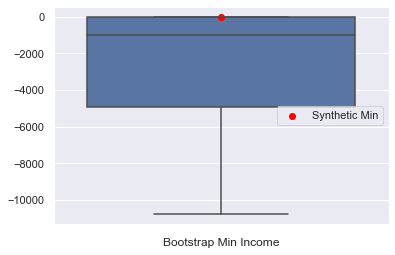

In [243]:
ax = sns.boxplot(data=np.array(min_arr))
ax.set(xticklabels=[])
ax.scatter([0], [np.min(data_synthetic.iloc[:, 5])], color = 'red', label = 'Synthetic Min')
plt.legend()
ax.set_xlabel('Bootstrap Min Income');

### Wasserstein Distance

Here, we'll check the Wassertein distance between **income** arrays.

In [223]:
from scipy.stats import wasserstein_distance

dist_arr = []

num_samples = 1000

for i in range(1000):
    
    bootstrap = np.random.choice(data_original.iloc[:, 5], num_samples, replace = True)
    dist = wasserstein_distance(bootstrap, data_synthetic.iloc[:, 5])
    dist_arr.append(dist)

In [224]:
print('Average Wasserstein distance: ', np.mean(dist_arr))

Average Wasserstein distance:  nan


Does a NaN value make sense? Let's check the average for the income variable.

In [235]:
np.mean(mean_arr)

33775.440384

In [236]:
np.mean(data_synthetic.iloc[:, 5])

6959897.570854272

### Covariance of Variables

Let's check the dependence between the **age** and **income variable**.

In [225]:
from scipy.stats import pearsonr

corr_arr = []

num_samples = 1000

for i in range(1000):
    
    bootstrap_age = np.random.choice(data_original.loc[:, 'age'], num_samples, replace = True)
    bootstrap_educ = np.random.choice(data_original.loc[:, 'income'], num_samples, replace = True)
    
    corr, _ = pearsonr(bootstrap_age, bootstrap_educ)
    corr_arr.append(corr)

In [226]:
np.mean(corr_arr)

-0.00035323223283193394

In [227]:
data_synthetic = data_synthetic.dropna()
corr, _ = pearsonr(data_synthetic.loc[:, 'age'], data_synthetic.loc[:, 'income'])

In [228]:
corr

0.01185018798590011

In [229]:
abs(np.mean(corr_arr) - corr)

0.012203420218732044

**Age** and **income** are independent in both datasets. Now, let's check **age** and **education**.

In [230]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(data_original.loc[:, ['age', 'educ']])
  
# interpret p-value

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    

p value is 0.0
Dependent (reject H0)


In [231]:
stat, p, dof, expected = chi2_contingency(data_synthetic.loc[:, ['age', 'educ']])
  
# interpret p-value

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)') 

p value is 0.0
Dependent (reject H0)


**Age** and **education** are dependent in both datasets.

### Point Estimates

What's the probability of being male or female?

In [237]:
# Probability of being male or female

prob_arr = []

num_samples = 1000

for i in range(1000):
    
    bootstrap = np.random.choice(data_original.loc[:, 'sex'], num_samples, replace = True)
    unique, counts = np.unique(bootstrap, return_counts=True)
    prob_arr.append(counts/num_samples)

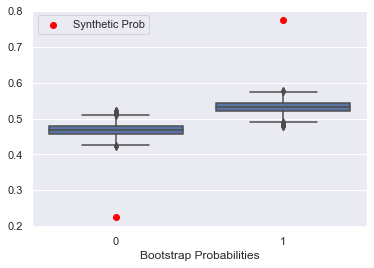

In [240]:
ax = sns.boxplot(data=np.array(prob_arr), color = 'b')
ax.set(xticklabels=[0, 1])
unique, synt_counts = np.unique(data_synthetic.loc[:, 'sex'], return_counts=True)
ax.scatter([0, 1], synt_counts/len(data_synthetic), color = 'red', label = 'Synthetic Prob')
plt.legend();
ax.set_xlabel('Bootstrap Probabilities');

For this variable we know the ground truth should be around 0.5. The results of the synthetic data are way off!